<a href="https://colab.research.google.com/github/Braither/Course_ComputationalTools/blob/main/HC_Tarea4_LinealAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

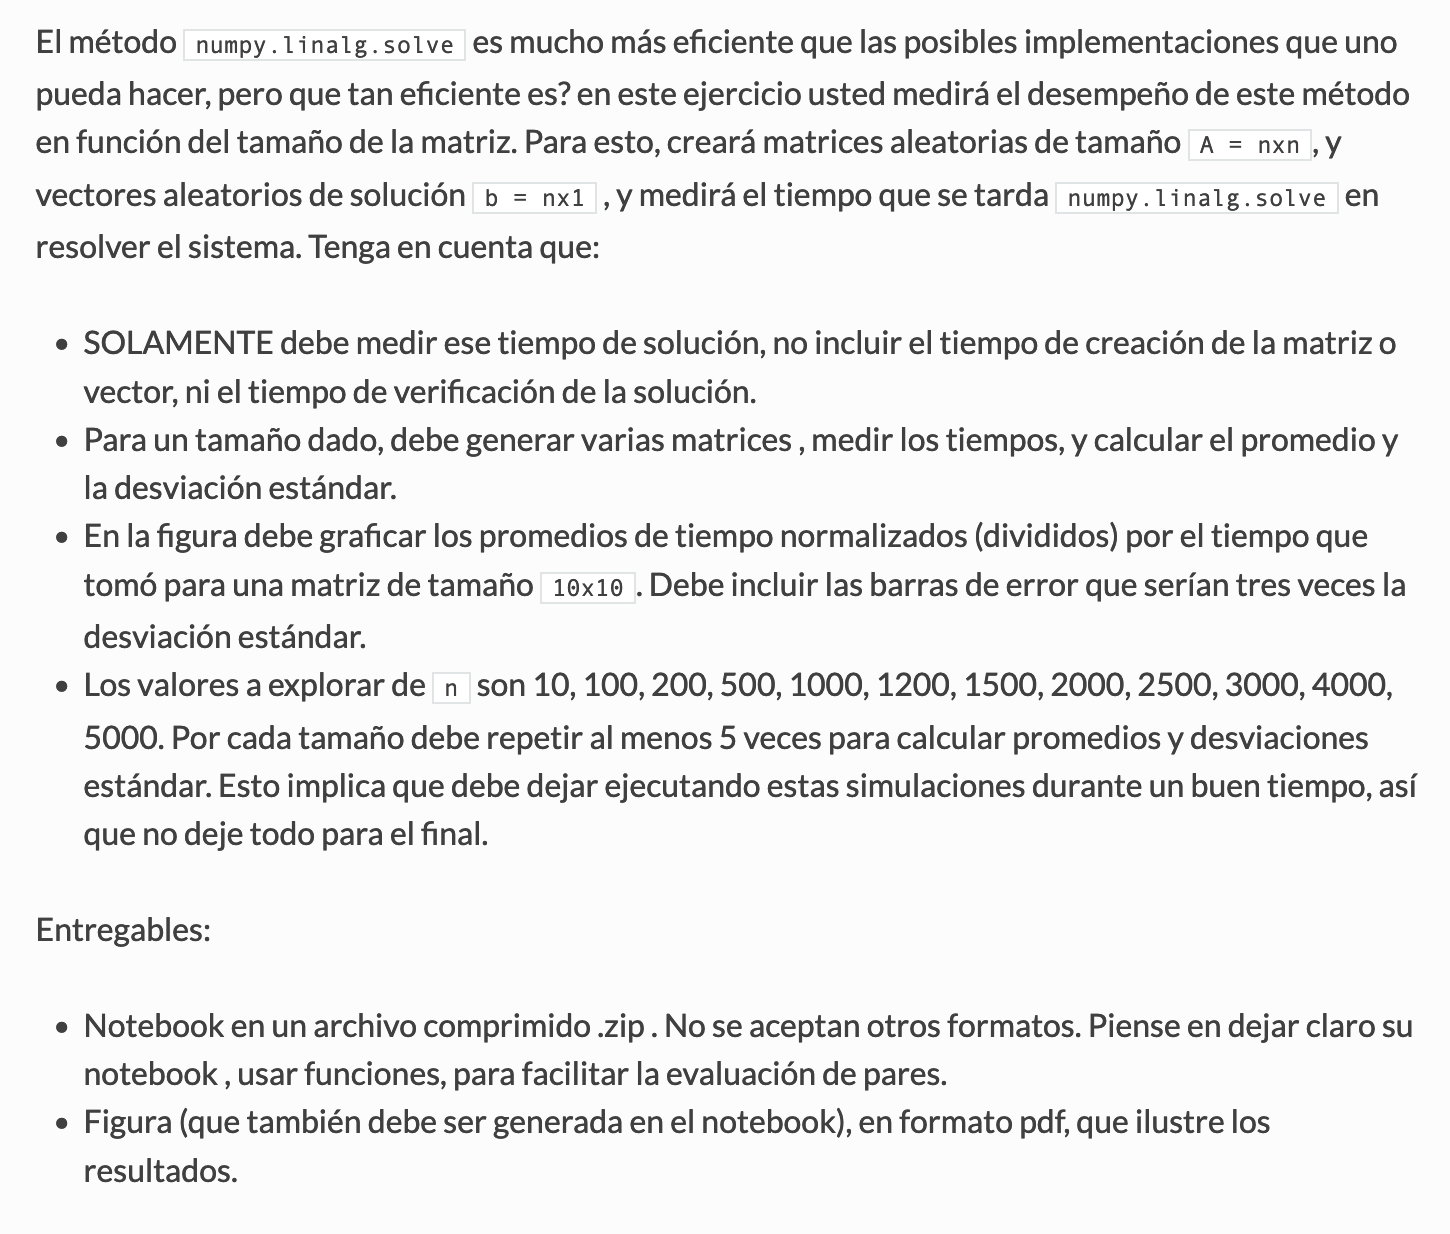

In [ ]:
import numpy as np
import time

#Definimos una función para medir el tiempo de ejecución de linalg.solve
def linalg_timer(sizelist = [10], iterations = 5):

  '''Esta función mide el tiempo de ejecución de linalg.solve
  Recibe como parametros una lista con los tamaños de las matrices
  que se buscan resolver con el método linalg.solve y el numero de
  iteraciones a realizar para un mismo tamaño. Por ejemplo, linalg_timer([10, 100], 10)
  realiza 10 iteraciones para los tamaños 10x10 y 100x100.

  La función retorna una lista de los tiempos normalizados y una lista
  con los errores asociados a cada medición del tiempo. '''

  #Se inicializan las listas y valores de media y desviación estandar
  normal_times = []
  error_times = []
  times_mean = None
  times_std = None


  for n in sizelist:
    flag = 0
    times = []

    #Se miden los tiempos para un tamaño n, una cierta cantidad de veces (iteraciones)
    while flag < iterations:
      A, b = np.random.rand(n, n), np.random.rand(n, 1)
      time_1 = time.time()
      np.linalg.solve(A, b)
      time_2 = time.time()
      times.append(time_2 - time_1)
      flag += 1

    #Se convierten las listas en arreglos de numpy para facilitar el cálculo de media y desviación estandar
    times = np.array(times)
    times_mean = np.mean(times)
    times_std = np.std(times)

    #Se selecciona el valor con el cual se van a normalizar los tiempos y la desviación estandar
    if n == 10:
      time_mean_n10 = times_mean

    #Se construyen las listas de los tiempos y errores normalizados
    normal_times.append(times_mean/time_mean_n10)
    error_times.append((3*times_std)/time_mean_n10)

  return  np.array(normal_times), np.array(error_times)


#Establecemos la lista de tamaños
nlist = np.array([10, 100, 200, 500, 1000, 1200, 1500, 2000, 2500, 3000, 4000, 5000])
iterations = 15
#Se llama a la función
normal_times, error_times = linalg_timer(nlist, iterations)

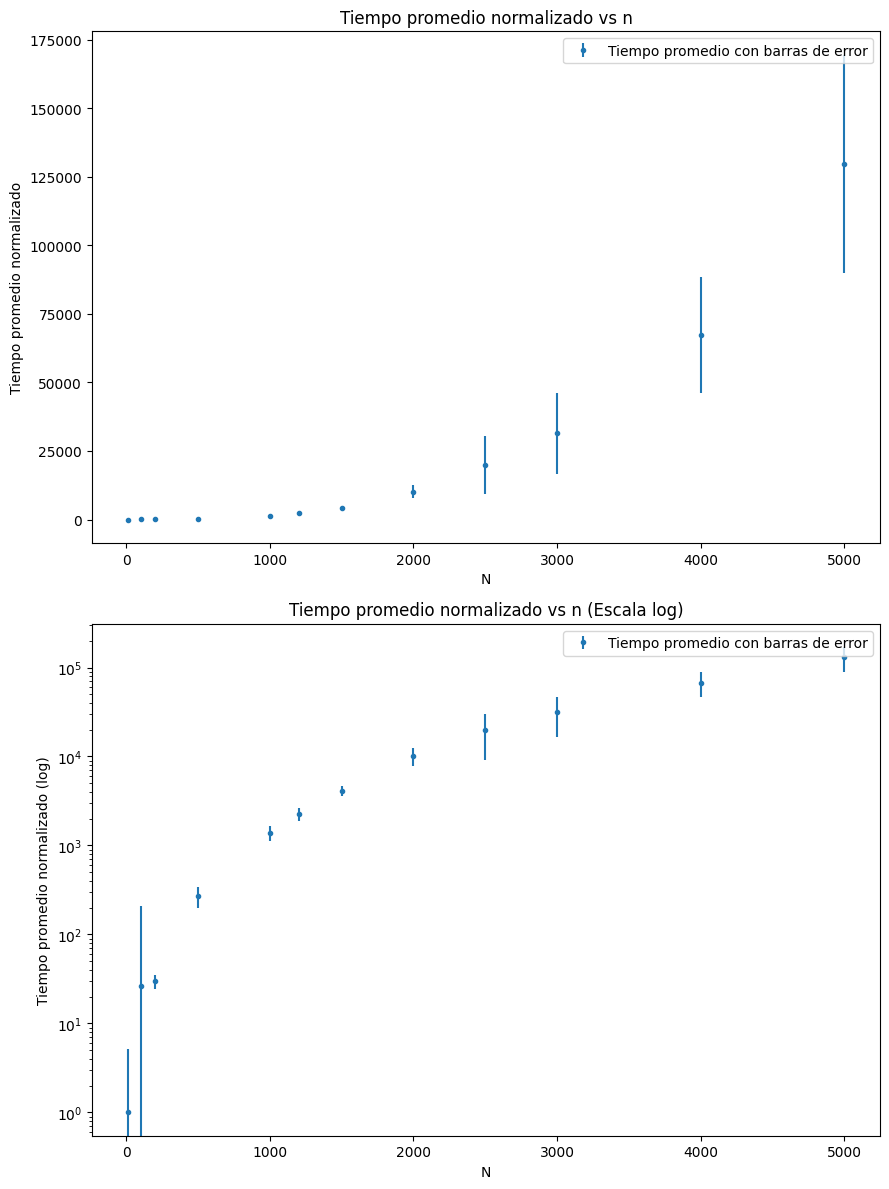

In [ ]:
import matplotlib.pyplot as plt

#Esta sección es para realizar la gráfica
#Se crea una figura y un conjunto de ejes (subplots)
fig, axs = plt.subplots(2, figsize=(9,12))

#Se grafica en el primer conjunto de ejes (arriba)
axs[0].errorbar(nlist, normal_times, yerr = error_times, fmt='.', label='Tiempo promedio con barras de error')
axs[0].set_title('Tiempo promedio normalizado vs n')
axs[0].set_xlabel('N')
axs[0].set_ylabel('Tiempo promedio normalizado')
axs[0].legend()

#Se grafica en el segundo conjunto de ejes (abajo)
axs[1].errorbar(nlist, normal_times,  yerr = error_times, fmt='.', label='Tiempo promedio con barras de error')
axs[1].set_title('Tiempo promedio normalizado vs n (Escala log)')
axs[1].set_xlabel('N')
axs[1].set_ylabel('Tiempo promedio normalizado (log)')
axs[1].set_yscale('log')
axs[1].legend()

plt.tight_layout()
plt.savefig('HC_Tarea4_LinealAlgebra_Graph.pdf')
plt.show()
